# Brief Overview about the data

# Problem statement:
The bussiness wants to understand the purchasing patterns among the people which will allow them to make better bussiness 
decisions.

# Plan of action:
    
In this dataset,the plan of action is analyzing the patterns among spending and purchasing among Male and Female and various
other factors that affect the sales among them for example sales on special events like Black friday

# Features in our dataset


In [3]:
#Importing libraries

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import pylab

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)

In [4]:
#Importing data set 
df = pd.read_csv("walmart_data.txt")


In [5]:
#Creating a copy of dataset
data = df.copy()

In [161]:
data.shape

(550068, 10)

In [162]:
data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Checking the data types of features

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Checking Null values in data

In [164]:
(data.isna().sum()/len(data))*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

Checking missing values

In [165]:
(data.isna().sum())


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [166]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Converting following features into categorical variables since they dont contribute as Continous values

In [7]:
data["Product_Category"] = data["Product_Category"].astype("str")
data["Marital_Status"] = data["Marital_Status"].astype("str")
data["Occupation"] = data["Occupation"].astype("str")
data["User_ID"] = data["User_ID"].astype("str")

In [8]:
data.describe(include="object")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [10]:
data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [11]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [170]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [171]:
data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [172]:
data["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [173]:
data["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [174]:
data["Marital_Status"].replace({"0":"Singe",
                               "1":"Married"},inplace=True)

In [175]:
Male_data = data.loc[data["Gender"]=="M"]
Female_data = data.loc[data["Gender"]=="F"]

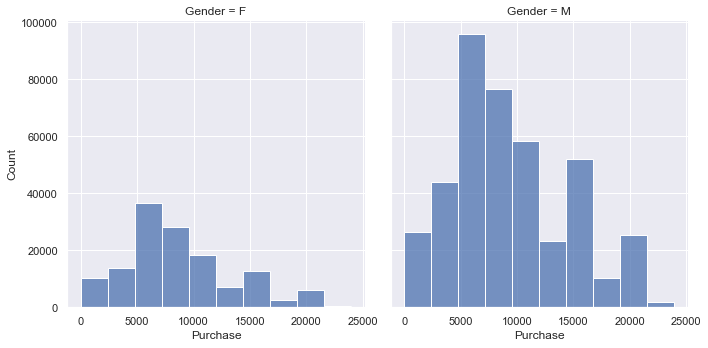

In [176]:
sns.displot(x = data["Purchase"], bins = 10, col=data["Gender"])
plt.show()

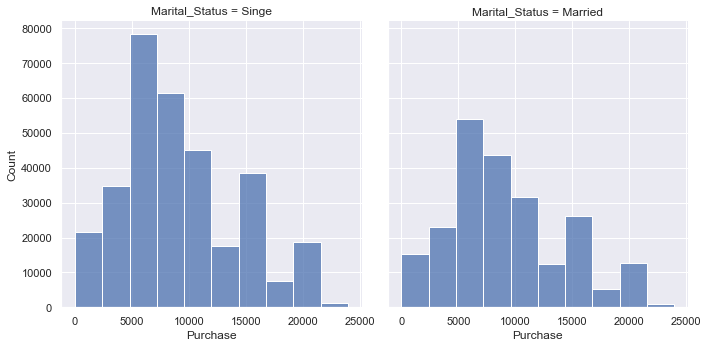

In [177]:
sns.displot(x = data["Purchase"], bins = 10, col=data["Marital_Status"])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

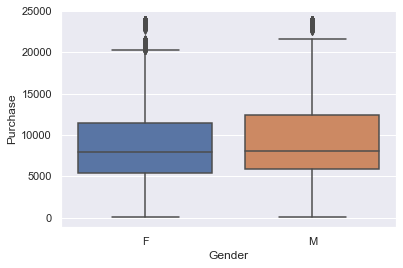

In [178]:
sns.boxplot(x = "Gender", y = "Purchase", data = data)

In [179]:
def detect_and_remove_outliers(data):
    Q1 = np.percentile(data["Purchase"],25)
    Q3 = np.percentile(data["Purchase"],75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    return data.loc[(data["Purchase"]>lowerbound)&(data["Purchase"]<upperbound)]

In [180]:
data = detect_and_remove_outliers(data)

In [181]:
from scipy import stats
condition =  data["Gender"]=="M"
samplemale = data[condition].sample(n=135809)
samplefemale = data.loc[data["Gender"]=="F"]
unbiased_data = pd.concat([samplemale,samplefemale])

In [182]:
data["Gender"].value_counts()

M    412171
F    135220
Name: Gender, dtype: int64

In [183]:
#Since we have to perform our analysis on the assumption of 50 million malesand 50 million females.
#So sampling the data accordibg to male female ratio
135220/412171

0.3280677194659498

In [184]:
malesample = data["Gender"]=="M"
sample_male = data[malesample].sample(n=135220)
sample_female = data.loc[data["Gender"]=="F"]
my_equaldata=pd.concat([sample_male,sample_female])

In [185]:
my_equaldata['Gender'].value_counts()

M    135220
F    135220
Name: Gender, dtype: int64

In [186]:
def Bootstrapping_CLT_CI(data, confidence=95 , sample_size = 40000,trials = 100):
    
    
    
    print("Distribution of data before Sampling")
    sns.distplot(data,bins = 15)
    plt.show()

    bootstrapped_mean= np.empty(trials)
    #sample_mean_trend = []

    for i in range(trials):
        btssample = data.sample(n=sample_size)
        #btssample = data.sample(n=sample_size).mean()
        bootstrapped_mean[i] = np.mean(btssample)
        #sample_mean_trend.append(btsample)
    
    print("Distribution of data after Sampling")
    sns.distplot(bootstrapped_mean,bins = 15)
    print()
    sample_mean = np.mean(bootstrapped_mean)
    sample_std_dev = np.std(data)
    standard_error = sample_std_dev/np.sqrt(sample_size)
    
    
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    
    print("t:",talfa_by2)
    
    margin_of_error = talfa_by2*standard_error
    
    print("sample mean :",sample_mean)
    
    print("sample standard deviation :",sample_std_dev)
    
    print("sample size: ",sample_size)
    
    print("standard error :",standard_error)
    
    print("Margin of Error :",margin_of_error)


    lower_ = sample_mean - margin_of_error
    
    upper_ = sample_mean + margin_of_error
    
    CI = (lower_,upper_)

    plt.axvline(x = lower_,c = "r")
    
    plt.axvline(x = upper_,c = "r")
    
    plt.show()



    print("Confidence Interval : ",CI)

Distribution of data before Sampling


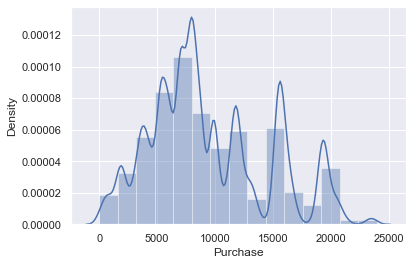

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9437.936960250001
sample standard deviation : 5092.180063635965
sample size:  10000
standard error : 50.92180063635965
Margin of Error : 99.81697795326703


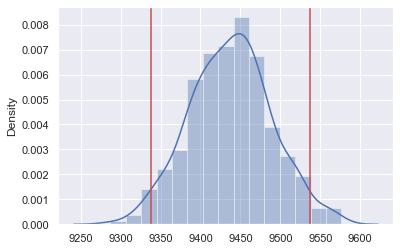

Confidence Interval :  (9338.119982296734, 9537.753938203268)


In [187]:
Bootstrapping_CLT_CI(Male_data["Purchase"],sample_size=10000,trials=400)

Distribution of data before Sampling


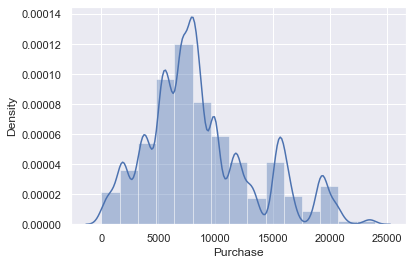

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 8737.11551275
sample standard deviation : 4767.215738017004
sample size:  10000
standard error : 47.672157380170034
Margin of Error : 93.44702313616553


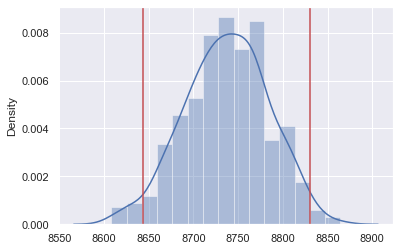

Confidence Interval :  (8643.668489613836, 8830.562535886165)


In [188]:
Bootstrapping_CLT_CI(Female_data["Purchase"],sample_size=10000,trials=400)

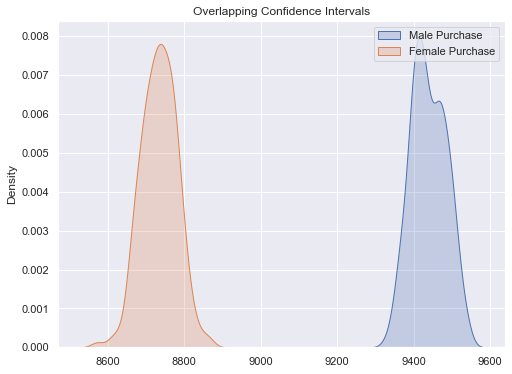

In [189]:
male_expense_mean = [Male_data['Purchase'].sample(10000).mean() for i in range(200)]
female_expense_mean = [Female_data['Purchase'].sample(10000).mean() for i in range(200)]

plt.figure(figsize=(8,6))
sns.kdeplot(male_expense_mean,shade=True,label="Male Purchase")
sns.kdeplot(female_expense_mean,shade=True,label="Female Purchase")
plt.title(f"Overlapping Confidence Intervals")
plt.legend()
plt.show()

As per 95 percent confidence intreval and 400 repeatations:
    
As we can see the with the confidence intreval level for both male and female purchase data there is no overlappping of
their amount of spends

Average Male purchase : 9340 - 9540
Average Female purchase :8640 - 8830    

In [190]:
data = my_equaldata.copy()
data["Age"].value_counts(normalize=True)*100

26-35    39.109969
36-45    19.990386
18-25    18.168540
46-50     8.764976
51-55     7.060716
55+       3.833383
0-17      3.072031
Name: Age, dtype: float64

Distribution of data before Sampling


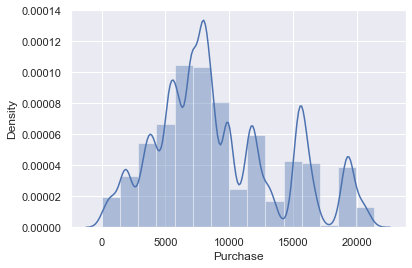

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9186.7317076
sample standard deviation : 4925.194245385393
sample size:  10000
standard error : 49.25194245385393
Margin of Error : 96.54371983385086


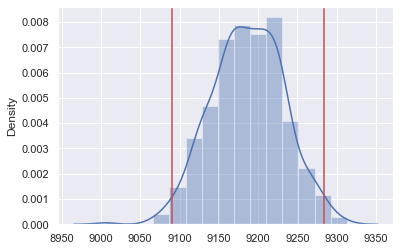

Confidence Interval :  (9090.187987766149, 9283.275427433851)


In [119]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Married"]["Purchase"],sample_size=10000,trials=500)

Distribution of data before Sampling


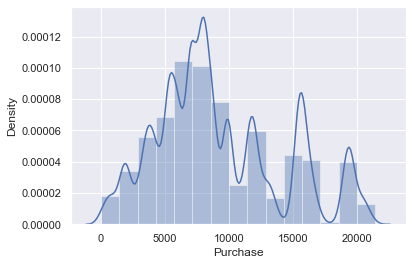

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9206.807156199999
sample standard deviation : 4948.319743238285
sample size:  10000
standard error : 49.48319743238285
Margin of Error : 96.99702613498198


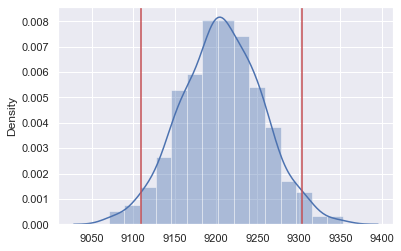

Confidence Interval :  (9109.810130065016, 9303.804182334981)


In [120]:
Bootstrapping_CLT_CI(data.loc[data["Marital_Status"]=="Singe"]["Purchase"],sample_size=10000,trials=500)

In [122]:
Singe_data = data.loc[data["Marital_Status"]=="Singe"]
Married_data = data.loc[data["Marital_Status"]=="Married"]

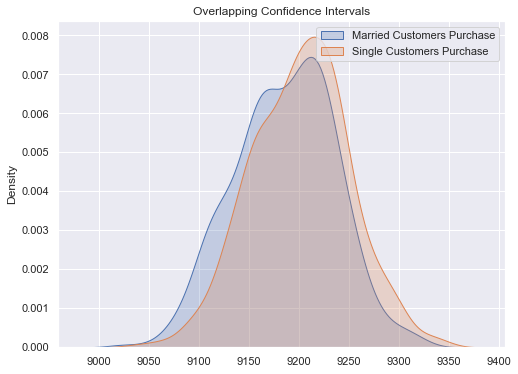

In [123]:
Married_expenses_mean = [Married_data['Purchase'].sample(10000).mean() for i in range(500)]
Singe_expenses_mean = [Singe_data['Purchase'].sample(10000).mean() for i in range(500)]

plt.figure(figsize=(8,6))
sns.kdeplot(Married_expenses_mean,shade=True,label="Married Customers Purchase")
sns.kdeplot(Singe_expenses_mean,shade=True,label="Single Customers Purchase")
plt.title(f"Overlapping Confidence Intervals")
plt.legend()
plt.show()

for Age Group 0-17
Distribution of data before Sampling


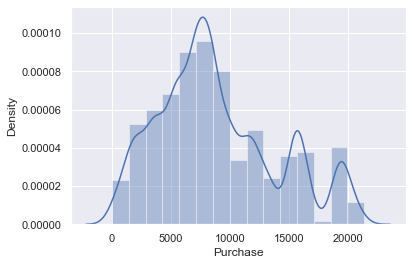

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 8868.688611200001
sample standard deviation : 5029.885531640416
sample size:  10000
standard error : 50.29885531640416
Margin of Error : 98.59587974992327


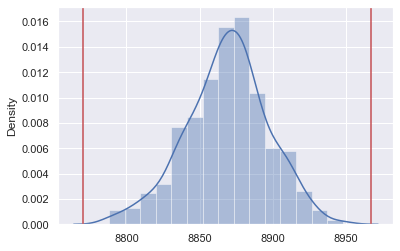

Confidence Interval :  (8770.092731450079, 8967.284490949924)
for Age Group 18-25
Distribution of data before Sampling


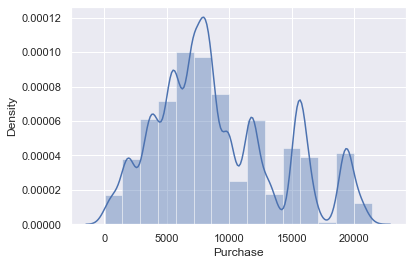

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9123.840510799999
sample standard deviation : 4978.80600076837
sample size:  10000
standard error : 49.7880600076837
Margin of Error : 97.59461814031755


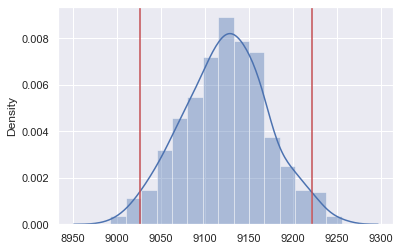

Confidence Interval :  (9026.245892659681, 9221.435128940317)
for Age Group 26-35
Distribution of data before Sampling


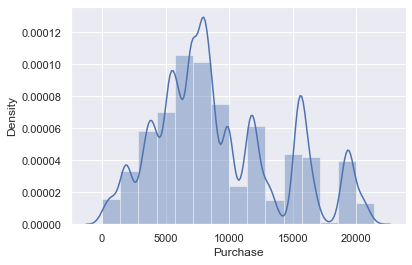

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9194.836337
sample standard deviation : 4937.399611184764
sample size:  10000
standard error : 49.37399611184764
Margin of Error : 96.78296956847973


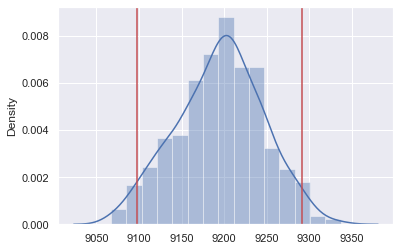

Confidence Interval :  (9098.053367431521, 9291.61930656848)
for Age Group 36-45
Distribution of data before Sampling


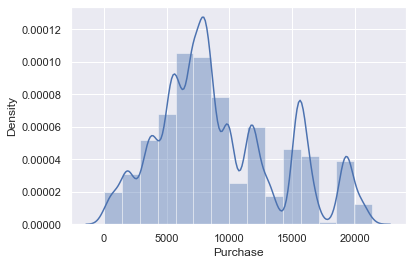

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9252.838707800001
sample standard deviation : 4927.721913381564
sample size:  10000
standard error : 49.27721913381564
Margin of Error : 96.59326721385196


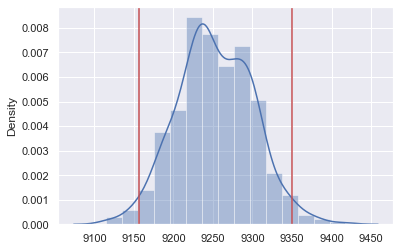

Confidence Interval :  (9156.24544058615, 9349.431975013853)
for Age Group 46-50
Distribution of data before Sampling


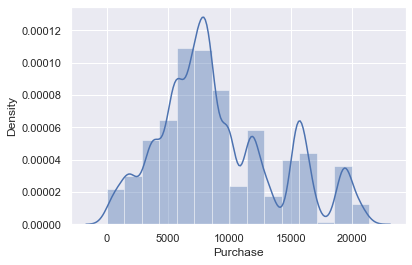

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9128.195444800001
sample standard deviation : 4867.360394530436
sample size:  10000
standard error : 48.67360394530436
Margin of Error : 95.41005995859109


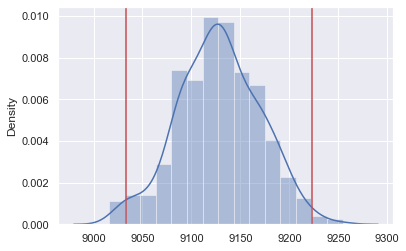

Confidence Interval :  (9032.78538484141, 9223.605504758592)
for Age Group 51-55
Distribution of data before Sampling


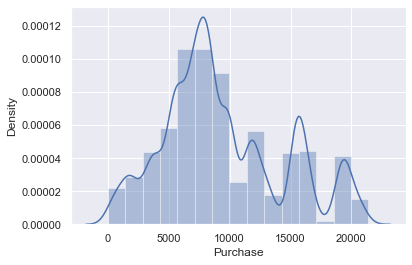

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9425.5651534
sample standard deviation : 4953.579795882421
sample size:  10000
standard error : 49.53579795882421
Margin of Error : 97.10013375337948


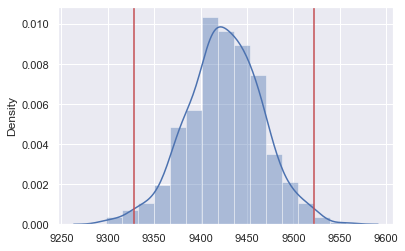

Confidence Interval :  (9328.465019646621, 9522.66528715338)
for Age Group 55+
Distribution of data before Sampling


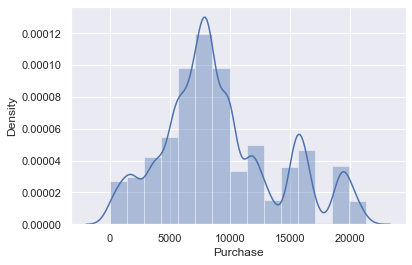

Distribution of data after Sampling

t: 1.9602012636213575
sample mean : 9214.3796182
sample standard deviation : 4861.512589781234
sample size:  10000
standard error : 48.61512589781234
Margin of Error : 95.29543121600314


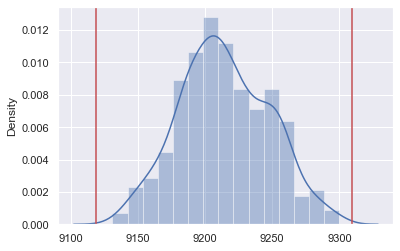

Confidence Interval :  (9119.084186983997, 9309.675049416004)


In [131]:
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    print("for Age Group "+age_group)
    Bootstrapping_CLT_CI(data.loc[data["Age"]==age_group]["Purchase"],sample_size=10000,trials=500)

Age Group :  0-17
Age Group :  18-25
Age Group :  26-35
Age Group :  36-45
Age Group :  46-50
Age Group :  51-55
Age Group :  55+


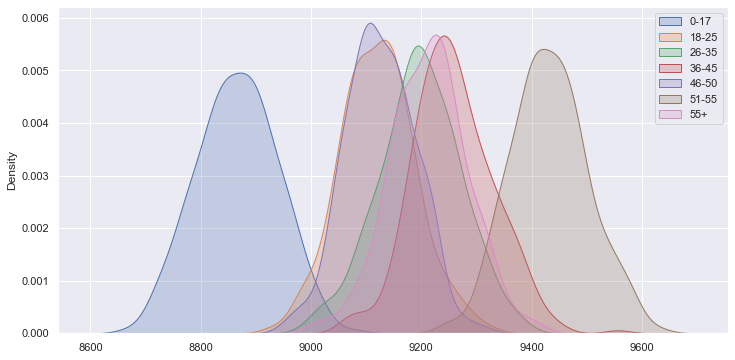

In [136]:
plt.figure(figsize=(12,6))
i = 1
for age_group in ['0-17', '18-25','26-35', '36-45', '46-50', '51-55', '55+' ]:
    
    print("Age Group : ", age_group)
    x = [data.loc[data["Age"]==age_group]['Purchase'].sample(5000,replace=True).mean() for i in range(300)]
    sns.kdeplot(x,shade=True,label=age_group)

    i = i+1


plt.legend()
    
plt.show()

In [ ]:
#Customers under the age 17 are the least spenders
#Customers bw the age of 51-55 spent the most amount

In [194]:
#Impact on Confidence Interval with Different Sample Size

SyntaxError: invalid syntax (3270966274.py, line 1)

In [195]:
def CI_with_different_sample_size(data,confidence=95 , sample_size=10000,trials = 500):
    
    bootstrapped_mean= np.empty(trials)

    for i in range(trials):
        btssample = data.sample(n=sample_size,replace=True)
        bootstrapped_mean[i] = np.mean(btssample)
    sample_mean = np.mean(bootstrapped_mean)
    sample_std = np.std(data)
    standard_error = sample_std/np.sqrt(sample_size)
    talfa_by2 = t.ppf((1-((1-(confidence)/100)/2)),df = sample_size-1)
    margin_of_error = talfa_by2*standard_error
    lower_ = sample_mean - margin_of_error
    upper_ = sample_mean + margin_of_error
    CI = (lower_,upper_)
    
    print()
    print("Confidence Level : ",confidence)
    print("Sample Size : ",sample_size)
    print("Margin of Error : ",margin_of_error)
    return f"Confidence Interval :,{CI}"

In [196]:
print(CI_with_different_sample_size(data["Purchase"],sample_size=50))
print(CI_with_different_sample_size(data["Purchase"],sample_size=250))
print(CI_with_different_sample_size(data["Purchase"],sample_size=750))
print(CI_with_different_sample_size(data["Purchase"],sample_size=1500))
print(CI_with_different_sample_size(data["Purchase"],sample_size=5000))
print(CI_with_different_sample_size(data["Purchase"],sample_size=25000))


Confidence Level :  95
Sample Size :  50
Margin of Error :  1382.255519493087
Confidence Interval :,(7636.157680506913, 10400.668719493086)

Confidence Level :  95
Sample Size :  250
Margin of Error :  605.8472981370695
Confidence Interval :,(8421.92717386293, 9633.621770137068)

Confidence Level :  95
Sample Size :  750
Margin of Error :  348.64936693254884
Confidence Interval :,(8668.386262400783, 9365.68499626588)

Confidence Level :  95
Sample Size :  1500
Margin of Error :  246.33285113524605
Confidence Interval :,(8779.453650198087, 9272.11935246858)

Confidence Level :  95
Sample Size :  5000
Margin of Error :  134.8457670789434
Confidence Interval :,(8889.969321721057, 9159.660855878943)

Confidence Level :  95
Sample Size :  25000
Margin of Error :  60.293178482275884
Confidence Interval :,(8961.739834797725, 9082.326191762277)


Text(0, 0.5, 'Sample mean')

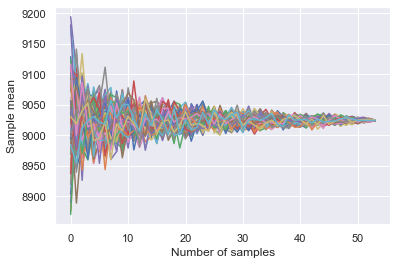

In [200]:
sample_mean_trend_f = []
for person in range(100):
    for num_samples in range(5000, len(data),5000):
        sample = data["Purchase"].sample(num_samples)
        sample_mean = np.mean(sample)
        sample_mean_trend_f.append(sample_mean)
    plt.plot(sample_mean_trend_f)
    sample_mean_trend_f= []
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")

In [ ]:
#Impact Of confidence intreval 

In [201]:
print(CI_with_different_sample_size(data["Purchase"],confidence=90,sample_size=10000))
print(CI_with_different_sample_size(data["Purchase"],confidence=95,sample_size=10000))
print(CI_with_different_sample_size(data["Purchase"],confidence=99,sample_size=10000))


Confidence Level :  90
Sample Size :  10000
Margin of Error :  80.00857955183498
Confidence Interval :,(8942.813095448166, 9102.830254551836)

Confidence Level :  95
Sample Size :  10000
Margin of Error :  95.33881065612967
Confidence Interval :,(8926.30897534387, 9116.986596656128)

Confidence Level :  99
Sample Size :  10000
Margin of Error :  125.30518865878585
Confidence Interval :,(8898.918424341215, 9149.528801658786)


In [ ]:
As we increase the confidence level,the interval of confidence for given parameter gets wider.

In [139]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Singe,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Singe,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Singe,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Singe,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Singe,8,7969


In [141]:
data["City_Category"].value_counts(normalize=True)*100

B    42.038324
C    31.100438
A    26.861238
Name: City_Category, dtype: float64

In [144]:
city_category = (data.groupby("City_Category")["Purchase"].sum()/data["Purchase"].sum()*100).sort_values(ascending=False)
city_category


City_Category
B    41.539455
C    32.622447
A    25.838098
Name: Purchase, dtype: float64

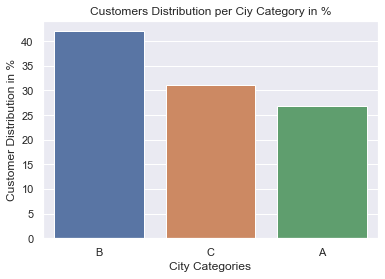

In [145]:
sns.barplot(x = (data["City_Category"].value_counts(normalize=True)*100).index,
            y = (data["City_Category"].value_counts(normalize=True)*100) )

plt.title("Customers Distribution per Ciy Category in %")
plt.xlabel("City Categories")
plt.ylabel("Customer Distribution in %")
plt.show()

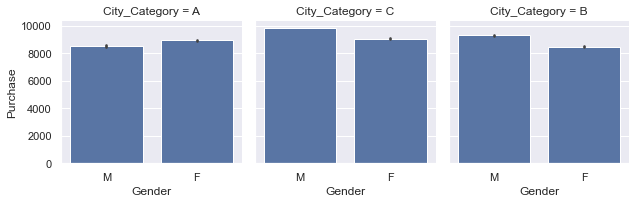

In [140]:
g = sns.FacetGrid(data,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

In [ ]:
#From C category city males tend to have most aggresive purchase
#From category B Males tend to have more purchase
#From category C Females tend to have aggresive purchase

In [147]:
#Categorizing Male Female probablity from different cities

In [148]:
pd.crosstab(columns=data["City_Category"],index=data["Age"],normalize="columns")*100


City_Category,A,B,C
Age,,,
0-17,1.717267,2.347967,4.172908
18-25,18.667537,18.731585,16.906621
26-35,49.921788,39.642525,31.740298
36-45,18.012596,20.583276,20.887448
46-50,5.149759,8.821280,10.321250
51-55,4.118039,7.650556,8.535547
55+,2.413014,2.222811,7.435929


In [ ]:
#As we can see most Customers are from are betteween 26-35.
#And most customers from city A are from 26-35 age group

In [149]:
pd.crosstab(columns=data["City_Category"],index=data["Stay_In_Current_City_Years"],normalize="columns")*100

City_Category,A,B,C
Stay_In_Current_City_Years,,,
0,16.359259,12.414282,12.579226
1,33.385701,36.066037,35.692342
2,18.358089,18.081907,19.256231
3,16.781605,18.466499,16.232870
4+,15.115346,14.971275,16.239331


In [150]:
#Most customer stay in city is around 1 year

In [153]:
ages_rev = (data.groupby("Age")["Purchase"].sum()/data["Purchase"].sum())*100

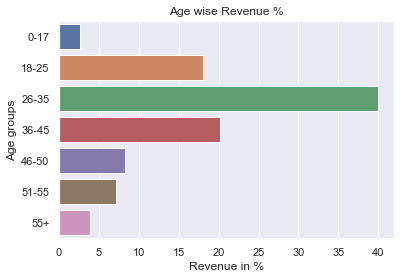

In [154]:
sns.barplot(y = ages_rev.index,
             x  = ages_rev)
plt.title("Age wise Revenue %")
plt.ylabel("Age groups")
plt.xlabel("Revenue in %")
plt.show()

In [157]:
#As we can see age bw 26-35 audience has most revenue generation
data['Gender'].value_counts()

M    412171
F    135220
Name: Gender, dtype: int64

In [191]:
(pd.crosstab(index= data["Age"],columns=data["Gender"],values=data["Purchase"],aggfunc=np.sum,margins=True)/data["Purchase"].sum())*100

Gender,F,M,All
Age,,,
0-17,1.716636,1.226912,2.943548
18-25,8.375034,9.434161,17.809195
26-35,17.966365,21.199397,39.165762
36-45,9.846131,10.386079,20.232210
46-50,4.721767,4.005958,8.727725
51-55,3.590227,3.674770,7.264997
55+,1.824153,2.032410,3.856563
All,48.040313,51.959687,100.000000


In [192]:
#As we can see  in male females most customers are from 26-35 age group only